# Exploring IMDB reviews dataset

### Some preliminaries

In [1]:
import os, glob
import pandas as pd

In [2]:
training_data_dir = "../Data/aclImdb/train"
labels = ["pos", "neg"]

In [3]:
def get_review_id(filename):
    return filename.split("_")[0]

###  Get training data

In [4]:
training_data = dict()
review_id = list()
review = list()
sentiment = list()

for label in labels:
    label_dir = training_data_dir + "/" + label
    for filename in os.listdir(label_dir):
        file = open(label_dir + "/" + filename, 'r')
        review_id.append(get_review_id(filename))
        review.append(file.read())
        sentiment.append(label)

training_data['review_id'] = review_id
training_data['review'] = review
training_data['sentiment'] = sentiment

td = pd.DataFrame(training_data)

### Get top words by sentiment

In [5]:
from collections import Counter

In [6]:
pos = td[td['sentiment']=='pos']
neg = td[td['sentiment']=='neg']

In [7]:
top_pos_words = pd.DataFrame(Counter(" ".join(pos["review"]).split()).most_common(1000), columns = ["word", "count"])
top_neg_words = pd.DataFrame(Counter(" ".join(neg["review"]).split()).most_common(1000), columns = ["word", "count"])

In [8]:
top_pos_words.head(10)

,word,count
0,the,148414
1,and,84276
2,a,79428
3,of,75341
4,to,65209
5,is,55358
6,in,45796
7,that,31943
8,I,30928
9,it,26991


In [9]:
top_neg_words.head(10)

,word,count
0,the,138618
1,a,75668
2,and,68388
3,of,67631
4,to,67359
5,is,47871
6,in,39784
7,I,35045
8,that,32617
9,this,31177


In [10]:
unique_pos_words = top_pos_words[~top_pos_words['word'].isin(list(top_neg_words['word']))]
unique_neg_words = top_neg_words[~top_neg_words['word'].isin(list(top_pos_words['word']))]

In [11]:
unique_pos_words.head(20)

,word,count
277,wonderful,1040
330,favorite,857
381,amazing,728
400,highly,691
423,!,657
443,strong,603
449,brilliant,601
492,relationship,546
508,heart,526
533,simple,502


In [12]:
unique_neg_words.head(20)

,word,count
155,worst,2072
241,waste,1265
302,stupid,923
338,terrible,807
340,boring,805
349,awful,791
376,worse,740
390,bad.,716
394,Why,706
438,"bad,",643


### Average word length

In [13]:
pos_word_lengths = unique_pos_words['word'].str.len()
pos_word_lengths.mean()

6.1962025316455698

In [14]:
neg_word_lengths = unique_neg_words['word'].str.len()
neg_word_lengths.mean()

5.5886075949367084

### Word count / length distributions

In [15]:
import seaborn as sns
%matplotlib inline

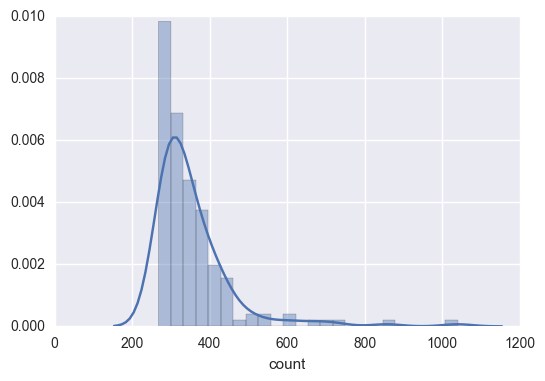

In [16]:
sns.distplot(unique_pos_words['count'])

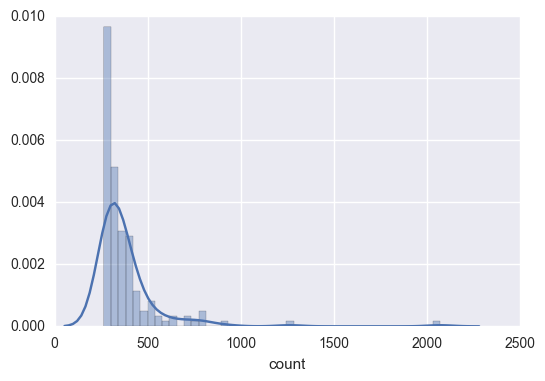

In [17]:
sns.distplot(unique_neg_words['count'])

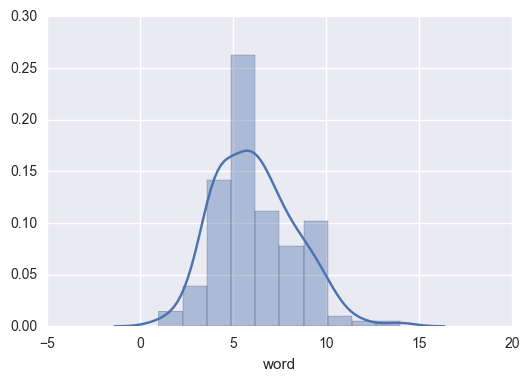

In [18]:
sns.distplot(pos_word_lengths)

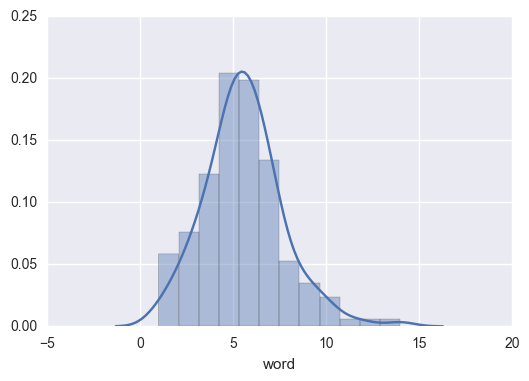

In [19]:
sns.distplot(neg_word_lengths)